<a href="https://colab.research.google.com/github/sherylsqin/CE888/blob/master/Lab7/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras import layers
from keras import models

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
model.compile(optimizer='Adagrad', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 45s 935us/step - loss: 0.2181 - acc: 0.9804 - val_loss: 0.0869 - val_acc: 0.9892
Epoch 2/5
48000/48000 [==============================] - 44s 924us/step - loss: 0.0285 - acc: 0.9947 - val_loss: 0.0852 - val_acc: 0.9889
Epoch 3/5
48000/48000 [==============================] - 44s 922us/step - loss: 0.0155 - acc: 0.9967 - val_loss: 0.0732 - val_acc: 0.9890
Epoch 4/5
48000/48000 [==============================] - 45s 938us/step - loss: 0.0112 - acc: 0.9978 - val_loss: 0.0685 - val_acc: 0.9892
Epoch 5/5
48000/48000 [==============================] - 44s 921us/step - loss: 0.0090 - acc: 0.9983 - val_loss: 0.0672 - val_acc: 0.9894


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 309us/step


0.9925

In [0]:
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 46s 959us/step - loss: 0.0075 - acc: 0.9989 - val_loss: 0.0696 - val_acc: 0.9896
Epoch 2/5
48000/48000 [==============================] - 46s 957us/step - loss: 0.0069 - acc: 0.9990 - val_loss: 0.0656 - val_acc: 0.9898
Epoch 3/5
48000/48000 [==============================] - 46s 953us/step - loss: 0.0066 - acc: 0.9990 - val_loss: 0.0649 - val_acc: 0.9901
Epoch 4/5
48000/48000 [==============================] - 45s 934us/step - loss: 0.0063 - acc: 0.9992 - val_loss: 0.0640 - val_acc: 0.9901
Epoch 5/5
48000/48000 [==============================] - 45s 933us/step - loss: 0.0060 - acc: 0.9993 - val_loss: 0.0647 - val_acc: 0.9903


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 319us/step


0.993

In [0]:
model.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 46s 968us/step - loss: 0.0846 - acc: 0.9882 - val_loss: 0.1225 - val_acc: 0.9874
Epoch 2/5
48000/48000 [==============================] - 46s 957us/step - loss: 0.1242 - acc: 0.9869 - val_loss: 0.2137 - val_acc: 0.9821
Epoch 3/5
48000/48000 [==============================] - 46s 955us/step - loss: 0.2017 - acc: 0.9837 - val_loss: 0.5953 - val_acc: 0.9553
Epoch 4/5
48000/48000 [==============================] - 46s 953us/step - loss: 0.3194 - acc: 0.9774 - val_loss: 0.2729 - val_acc: 0.9815
Epoch 5/5
48000/48000 [==============================] - 46s 951us/step - loss: 0.3376 - acc: 0.9770 - val_loss: 0.2910 - val_acc: 0.9808


In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 313us/step


0.9814

In [0]:
model.compile(optimizer='Adadelta', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 48s 998us/step - loss: 0.2133 - acc: 0.9855 - val_loss: 0.2149 - val_acc: 0.9857
Epoch 2/5
48000/48000 [==============================] - 47s 986us/step - loss: 0.1653 - acc: 0.9886 - val_loss: 0.2525 - val_acc: 0.9834
Epoch 3/5
48000/48000 [==============================] - 47s 979us/step - loss: 0.1769 - acc: 0.9881 - val_loss: 0.2675 - val_acc: 0.9825
Epoch 4/5
48000/48000 [==============================] - 47s 980us/step - loss: 0.1675 - acc: 0.9885 - val_loss: 0.2200 - val_acc: 0.9852
Epoch 5/5
48000/48000 [==============================] - 47s 975us/step - loss: 0.1495 - acc: 0.9896 - val_loss: 0.2194 - val_acc: 0.9854


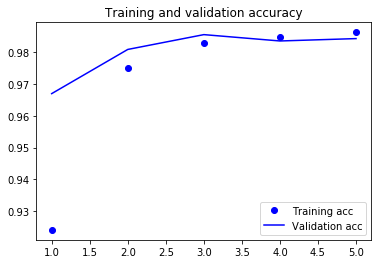

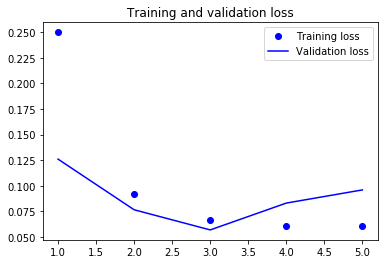

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()